#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [81]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

# Task 1: Become familiar with the dataset

In [82]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:
- **CRIM:** per capita crime rate by town
- **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** proportion of non-retail business acres per town.
- **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX:** nitric oxides concentration (parts per 10 million)
- **RM:** average number of rooms per dwelling
- **AGE:** proportion of owner-occupied units built prior to 1940
- **DIS:** weighted distances to five Boston employment centres
- **RAD:** index of accessibility to radial highways
- **TAX:** full-value property-tax rate per \$10,000
- **PTRATIO:** pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in $1000's

In [83]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 2: Generate Descriptive Statistics and Visualizations

##### For the "Median value of owner-occupied homes" provide a boxplot

This graph indicates that the variable "Median value of owner-occupied homes" follows a normal distribution. Additionally, we can observe that the data's quantiles lie approximately between 15 and 38 for the Q1 and Q3 quantiles, respectively. Finally, there are some outliers in the right whisker, suggesting that house prices were higher in specific years.

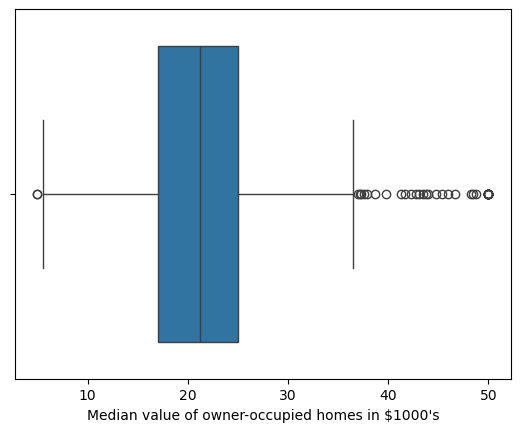

In [96]:
sns.boxplot(x = boston_df['MEDV'])
pyplot.xlabel('Median value of owner-occupied homes in $1000\'s')
pyplot.show()

##### Provide a  bar plot for the Charles river variable
In this plot, we can observe that the number of tracts that border the Charles River is much smaller than those that do not.

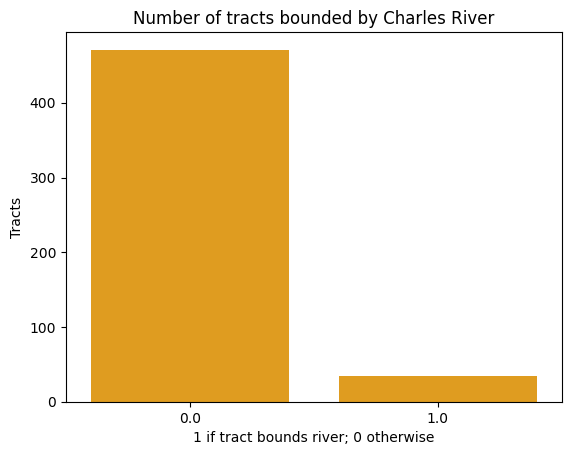

In [87]:
sns.barplot(x=boston_df['CHAS'].unique(),
            y=boston_df['CHAS'].value_counts(),
            color='orange' )
pyplot.title('Number of tracts bounded by Charles River')
pyplot.ylabel('Tracts')
pyplot.xlabel('1 if tract bounds river; 0 otherwise')
pyplot.show()

##### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
From the boxplot, we can conclude that older houses are generally less expensive than younger houses.

In [105]:
for i in range(boston_df.shape[0]):
    if boston_df.loc[i,'AGE'] <= 35:
        boston_df.loc[i,'dis_AGE'] = 1
    elif 35 < boston_df.loc[i,'AGE'] < 70:
        boston_df.loc[i,'dis_AGE'] = 2
    elif boston_df.loc[i,'AGE'] >= 70:
        boston_df.loc[i,'dis_AGE'] = 3

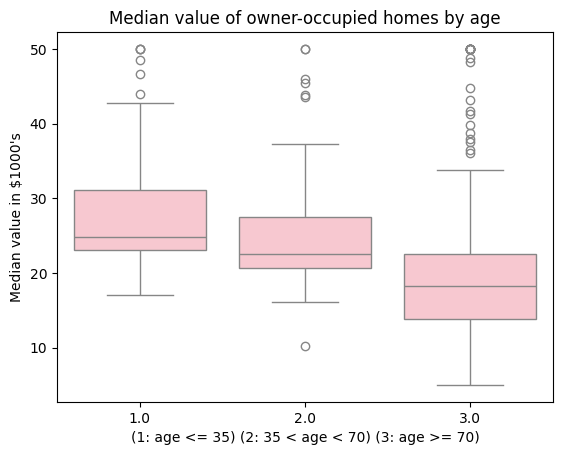

In [107]:
sns.boxplot(x=boston_df['dis_AGE'],
            y=boston_df['MEDV'],
            color='pink')
pyplot.title('Median value of owner-occupied homes by age')
pyplot.ylabel('Median value in $1000\'s')
pyplot.xlabel('(1: age <= 35) (2: 35 < age < 70) (3: age >= 70)')
pyplot.show()

##### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
The scatter plot shows a positive correlation between the variables, indicating that as nitric oxide concentrations increase, the proportion of non-retail businesses also increases.

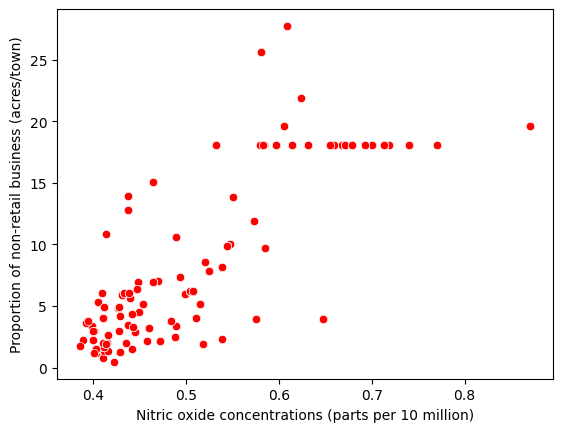

In [110]:
sns.scatterplot(data=boston_df, 
                x="NOX", y="INDUS", 
                color='red')
pyplot.ylabel('Proportion of non-retail business (acres/town)')
pyplot.xlabel('Nitric oxide concentrations (parts per 10 million)')
pyplot.show()

##### Create a histogram for the pupil to teacher ratio variable
We can conclude that the data is negatively skewed distribution.

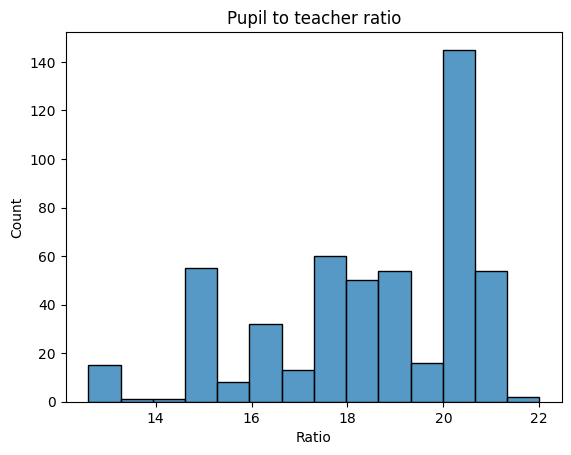

In [112]:
sns.histplot(data=boston_df, x="PTRATIO")
pyplot.xlabel('Ratio')
pyplot.title('Pupil to teacher ratio')
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Hypothesis:
*   $H_0: \mu_1 = \mu_2$ ("there is no difference in median value of houses between houses bounded by the Charles")
*   $H_1: \mu_1 ≠ \mu_2$ ("there is a difference in median value of houses between houses bounded by the Charles")

$\alpha=$0.05

**Conclusion:** Since the p-value<0.05, we reject the null hypothesis, indicating a statistical difference in the median value of houses bounded and not bounded by the Charles River.

In [113]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Hypothesis:
- $H_0: \mu_1 = \mu_2 = \mu_3$ (the three population means are equal)
- $H_1:$ At least one of the means differ

$\alpha=$0.05

**Conclusion:** Since the p-value<0.05, we reject the null hypothesis as there is significant evidence that at least one of the means differ.

In [115]:
thirtyfive_lower = boston_df[boston_df['dis_AGE'] == 1]['MEDV']
thirtyfive_seventy = boston_df[boston_df['dis_AGE'] == 2]['MEDV']
seventy_older = boston_df[boston_df['dis_AGE'] == 3]['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Hypothesis:

*   $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business
*   $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business

$\alpha=$0.05

**Conclusion:** Since the p-value<0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportion of non-retail business. Additionally, with a Pearson coefficient of 0.7 (close to 1), it indicates a strong positive correlation between the two variables.

In [116]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
**Conclusion:** The regression analysis shows a correlation coefficient of 0.79, indicating that as the distance to the five Boston employment centers increases, the median value of owner-occupied homes also increases.

In [117]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.21e-08
Time:                        16:49:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""